We will use this dataset to understand what factors are linked to customers leaving the bank.

In [90]:
# Libraries for Data manipulation
import pandas as pd

In [92]:
# Libraries for Numerical computing
import numpy as np

In [94]:
# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Libraries for Machine learning
from sklearn.linear_model import LinearRegression  

In [98]:
# Libraries for Import my dataset
df = pd.read_excel("C:/Users/yesmi/Downloads/BELGHITH_Yesmine.xlsx")   

In [99]:
# First 5 rows 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [106]:
# Data types and missing values
df.info()
# The dataset is complete and ready for analysis. (no missing data)
# We can drop the column "CLIENTNUM" and "Naive_Bayes_Classifier_Attrit"... and "Naive_Bayes_Classifier_Attrition_Flag_Card_Ca..." : not a using informations for analysis and modeling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [108]:
# Missing values
df.isnull().sum()       
# Every column has 0 missing values, we don't need to clean

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [110]:
# Summary statistics
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [112]:
# Drop columns that are not useful for analysis or modeling:
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1, inplace=True)

In [114]:
# First 5 rows to verify 
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


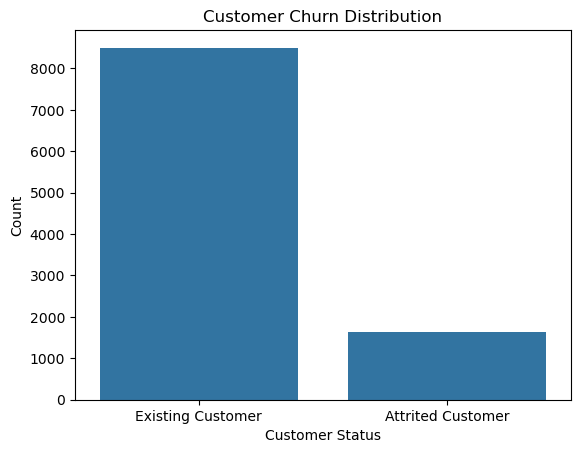

In [138]:
# How many customers left vs stayed?
# Bar plot of attrition vs existing customers
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Customer Churn Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# The churn rate is relatively low. This imbalance should be considered if you plan to build predictive models later, as models may be biased toward predicting "Existing Customer" unless rebalanced.

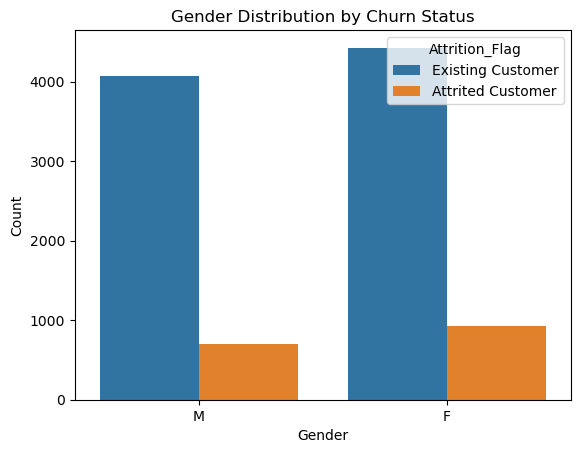

In [140]:
# Are men or women more likely to churn?
# Bar Plot of Gender vs Churn
sns.countplot(data=df, x='Gender', hue='Attrition_Flag')
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# While churn exists across both genders, the data suggests female customers churn at a slightly higher rate. Gender might be a factor worth exploring further in combination with other features (e.g., age, income, education).

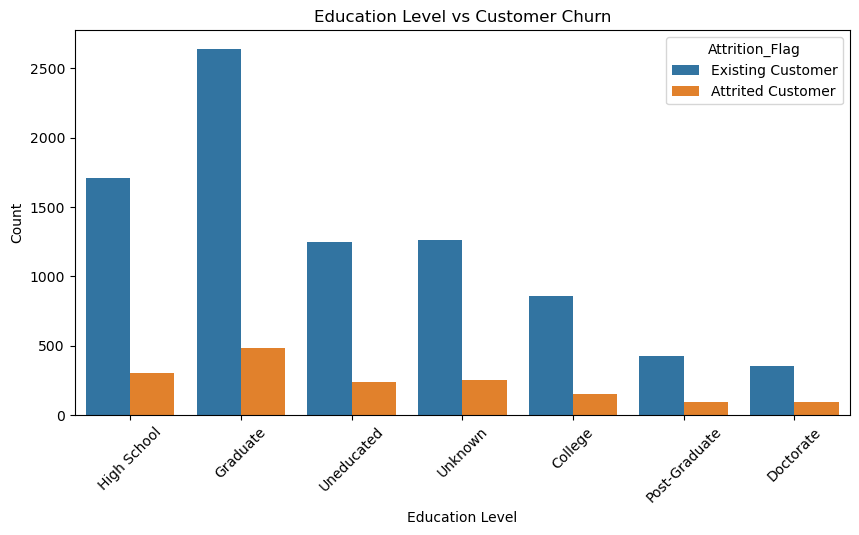

In [142]:
# Are certain education levels more likely to churn?
# Bar Plot of Education Level vs Churn
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')
plt.title('Education Level vs Customer Churn')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Less-educated customers churn more. Education level may influence likelihood of leaving the bank.

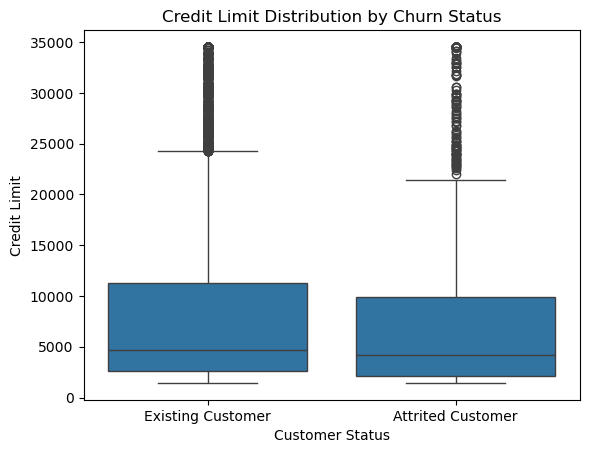

In [144]:
# Do customers who leave have lower/higher credit limits?
# Box Plot of Credit Limit by Churn
sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit')
plt.title('Credit Limit Distribution by Churn Status')
plt.xlabel('Customer Status')
plt.ylabel('Credit Limit')
plt.show()

# Churned customers often have lower credit limits. Limited credit may be linked to higher churn.

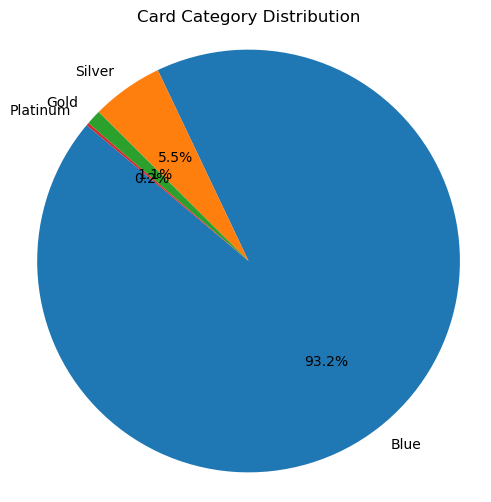

In [146]:
# Count how many customers fall into each Card Category
card_counts = df['Card_Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(card_counts, labels=card_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Card Category Distribution')
plt.axis('equal')  # Makes the pie chart a perfect circle
plt.show()

# Most customers have Blue cards. Low card-tier diversity could play a role in customer attrition.